In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Google-Fit Analysis

In [2]:
df = pd.read_csv('/Users/ashmi/Desktop/Takeout/Fit/Daily Aggregations/Daily_Summaries.csv')

In [3]:
df.head()

,Date,Calories (kcal),Distance (m),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Biking duration (ms),Inactive duration (ms),Walking duration (ms),Swimming duration (ms)
0,2018-04-07,1957.082276,16000.000000,49.240078,7.007611,49.240417,7.008410,0.890280,1.520000,0.510000,36011,NaN,NaN,NaN,NaN,14433639,21600000.0,NaN
1,2018-04-08,1922.932013,2642.776231,49.239986,7.007116,49.245480,7.020480,0.783945,6.310000,0.017497,5390,NaN,NaN,NaN,NaN,83389456,3010544.0,NaN
2,2018-04-09,2030.735670,3953.725484,49.240032,7.006672,49.257984,7.046369,0.749176,7.420000,0.223258,6220,NaN,NaN,NaN,NaN,80841008,5071848.0,NaN
3,2018-04-10,1987.082169,2808.762585,49.240032,7.007427,49.257992,7.048122,0.889122,13.804393,0.007616,4949,NaN,NaN,NaN,NaN,80728198,4178529.0,NaN
4,2018-04-11,2215.964401,3236.184936,49.233269,6.996095,49.448689,7.756175,3.676224,29.656359,0.092467,7617,NaN,NaN,NaN,NaN,70609571,8196706.0,NaN


In [4]:
print (df.Date.min())
print (df.Date.max())

2018-04-07
2018-09-01


In [5]:
list(df)

['Date',
 'Calories (kcal)',
 'Distance (m)',
 'Low latitude (deg)',
 'Low longitude (deg)',
 'High latitude (deg)',
 'High longitude (deg)',
 'Average speed (m/s)',
 'Max speed (m/s)',
 'Min speed (m/s)',
 'Step count',
 'Average weight (kg)',
 'Max weight (kg)',
 'Min weight (kg)',
 'Biking duration (ms)',
 'Inactive duration (ms)',
 'Walking duration (ms)',
 'Swimming duration (ms)']

## Editing the column names

In [6]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.replace('(', '') for c in df.columns]
df.columns = [c.replace(')', '') for c in df.columns]
df.columns = [c.replace('/', '_per_') for c in df.columns]

In [7]:
df.head()

,Date,Calories_kcal,Distance_m,Low_latitude_deg,Low_longitude_deg,High_latitude_deg,High_longitude_deg,Average_speed_m_per_s,Max_speed_m_per_s,Min_speed_m_per_s,Step_count,Average_weight_kg,Max_weight_kg,Min_weight_kg,Biking_duration_ms,Inactive_duration_ms,Walking_duration_ms,Swimming_duration_ms
0,2018-04-07,1957.082276,16000.000000,49.240078,7.007611,49.240417,7.008410,0.890280,1.520000,0.510000,36011,NaN,NaN,NaN,NaN,14433639,21600000.0,NaN
1,2018-04-08,1922.932013,2642.776231,49.239986,7.007116,49.245480,7.020480,0.783945,6.310000,0.017497,5390,NaN,NaN,NaN,NaN,83389456,3010544.0,NaN
2,2018-04-09,2030.735670,3953.725484,49.240032,7.006672,49.257984,7.046369,0.749176,7.420000,0.223258,6220,NaN,NaN,NaN,NaN,80841008,5071848.0,NaN
3,2018-04-10,1987.082169,2808.762585,49.240032,7.007427,49.257992,7.048122,0.889122,13.804393,0.007616,4949,NaN,NaN,NaN,NaN,80728198,4178529.0,NaN
4,2018-04-11,2215.964401,3236.184936,49.233269,6.996095,49.448689,7.756175,3.676224,29.656359,0.092467,7617,NaN,NaN,NaN,NaN,70609571,8196706.0,NaN


In [8]:
df['Max_speed_m_per_s'].max()

212.01264953613281

## NaNs Analysis

In [9]:
df.shape

(148, 18)

In [10]:
## Calculating the number of NaNs in every column ##
df.isnull().sum(axis = 0)

Date                       0
Calories_kcal              1
Distance_m                16
Low_latitude_deg           0
Low_longitude_deg          0
High_latitude_deg          0
High_longitude_deg         0
Average_speed_m_per_s     16
Max_speed_m_per_s         16
Min_speed_m_per_s         16
Step_count                 0
Average_weight_kg        145
Max_weight_kg            145
Min_weight_kg            145
Biking_duration_ms       144
Inactive_duration_ms       0
Walking_duration_ms       14
Swimming_duration_ms     139
dtype: int64

In [11]:
df["Calories_kcal"].fillna("0", inplace = True)
df["Average_speed_m_per_s"].fillna("0", inplace = True)
df["Max_speed_m_per_s"].fillna(value = df['Max_speed_m_per_s'].min(), inplace = True)
df["Min_speed_m_per_s"].fillna(value = df['Min_speed_m_per_s'].min(), inplace = True)
df["Average_weight_kg"].fillna(value = df['Average_weight_kg'].max(), inplace = True)
df["Max_weight_kg"].fillna(value = df['Max_weight_kg'].max(), inplace = True)
df["Min_weight_kg"].fillna(value = df['Min_weight_kg'].max(), inplace = True)
df["Walking_duration_ms"].fillna("0", inplace = True)
df["Biking_duration_ms"].fillna("0", inplace = True)
df["Swimming_duration_ms"].fillna("0", inplace = True)
df.head()

,Date,Calories_kcal,Distance_m,Low_latitude_deg,Low_longitude_deg,High_latitude_deg,High_longitude_deg,Average_speed_m_per_s,Max_speed_m_per_s,Min_speed_m_per_s,Step_count,Average_weight_kg,Max_weight_kg,Min_weight_kg,Biking_duration_ms,Inactive_duration_ms,Walking_duration_ms,Swimming_duration_ms
0,2018-04-07,1957.08,16000.000000,49.240078,7.007611,49.240417,7.008410,0.89028,1.520000,0.510000,36011,68.0,68.0,68.0,0,14433639,2.16e+07,0
1,2018-04-08,1922.93,2642.776231,49.239986,7.007116,49.245480,7.020480,0.783945,6.310000,0.017497,5390,68.0,68.0,68.0,0,83389456,3.01054e+06,0
2,2018-04-09,2030.74,3953.725484,49.240032,7.006672,49.257984,7.046369,0.749176,7.420000,0.223258,6220,68.0,68.0,68.0,0,80841008,5.07185e+06,0
3,2018-04-10,1987.08,2808.762585,49.240032,7.007427,49.257992,7.048122,0.889122,13.804393,0.007616,4949,68.0,68.0,68.0,0,80728198,4.17853e+06,0
4,2018-04-11,2215.96,3236.184936,49.233269,6.996095,49.448689,7.756175,3.67622,29.656359,0.092467,7617,68.0,68.0,68.0,0,70609571,8.19671e+06,0


In [12]:
df.head()

,Date,Calories_kcal,Distance_m,Low_latitude_deg,Low_longitude_deg,High_latitude_deg,High_longitude_deg,Average_speed_m_per_s,Max_speed_m_per_s,Min_speed_m_per_s,Step_count,Average_weight_kg,Max_weight_kg,Min_weight_kg,Biking_duration_ms,Inactive_duration_ms,Walking_duration_ms,Swimming_duration_ms
0,2018-04-07,1957.08,16000.000000,49.240078,7.007611,49.240417,7.008410,0.89028,1.520000,0.510000,36011,68.0,68.0,68.0,0,14433639,2.16e+07,0
1,2018-04-08,1922.93,2642.776231,49.239986,7.007116,49.245480,7.020480,0.783945,6.310000,0.017497,5390,68.0,68.0,68.0,0,83389456,3.01054e+06,0
2,2018-04-09,2030.74,3953.725484,49.240032,7.006672,49.257984,7.046369,0.749176,7.420000,0.223258,6220,68.0,68.0,68.0,0,80841008,5.07185e+06,0
3,2018-04-10,1987.08,2808.762585,49.240032,7.007427,49.257992,7.048122,0.889122,13.804393,0.007616,4949,68.0,68.0,68.0,0,80728198,4.17853e+06,0
4,2018-04-11,2215.96,3236.184936,49.233269,6.996095,49.448689,7.756175,3.67622,29.656359,0.092467,7617,68.0,68.0,68.0,0,70609571,8.19671e+06,0


## Distance and Date Analysis

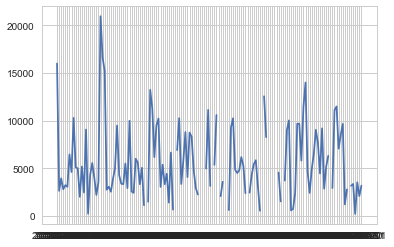

In [13]:
sns.set(style="whitegrid")

# sns.set(rc={'figure.figsize':(50.7,20.27)})
plt.plot(df.Date, df.Distance_m)
plt.figure(figsize=(50,50))
plt.show()

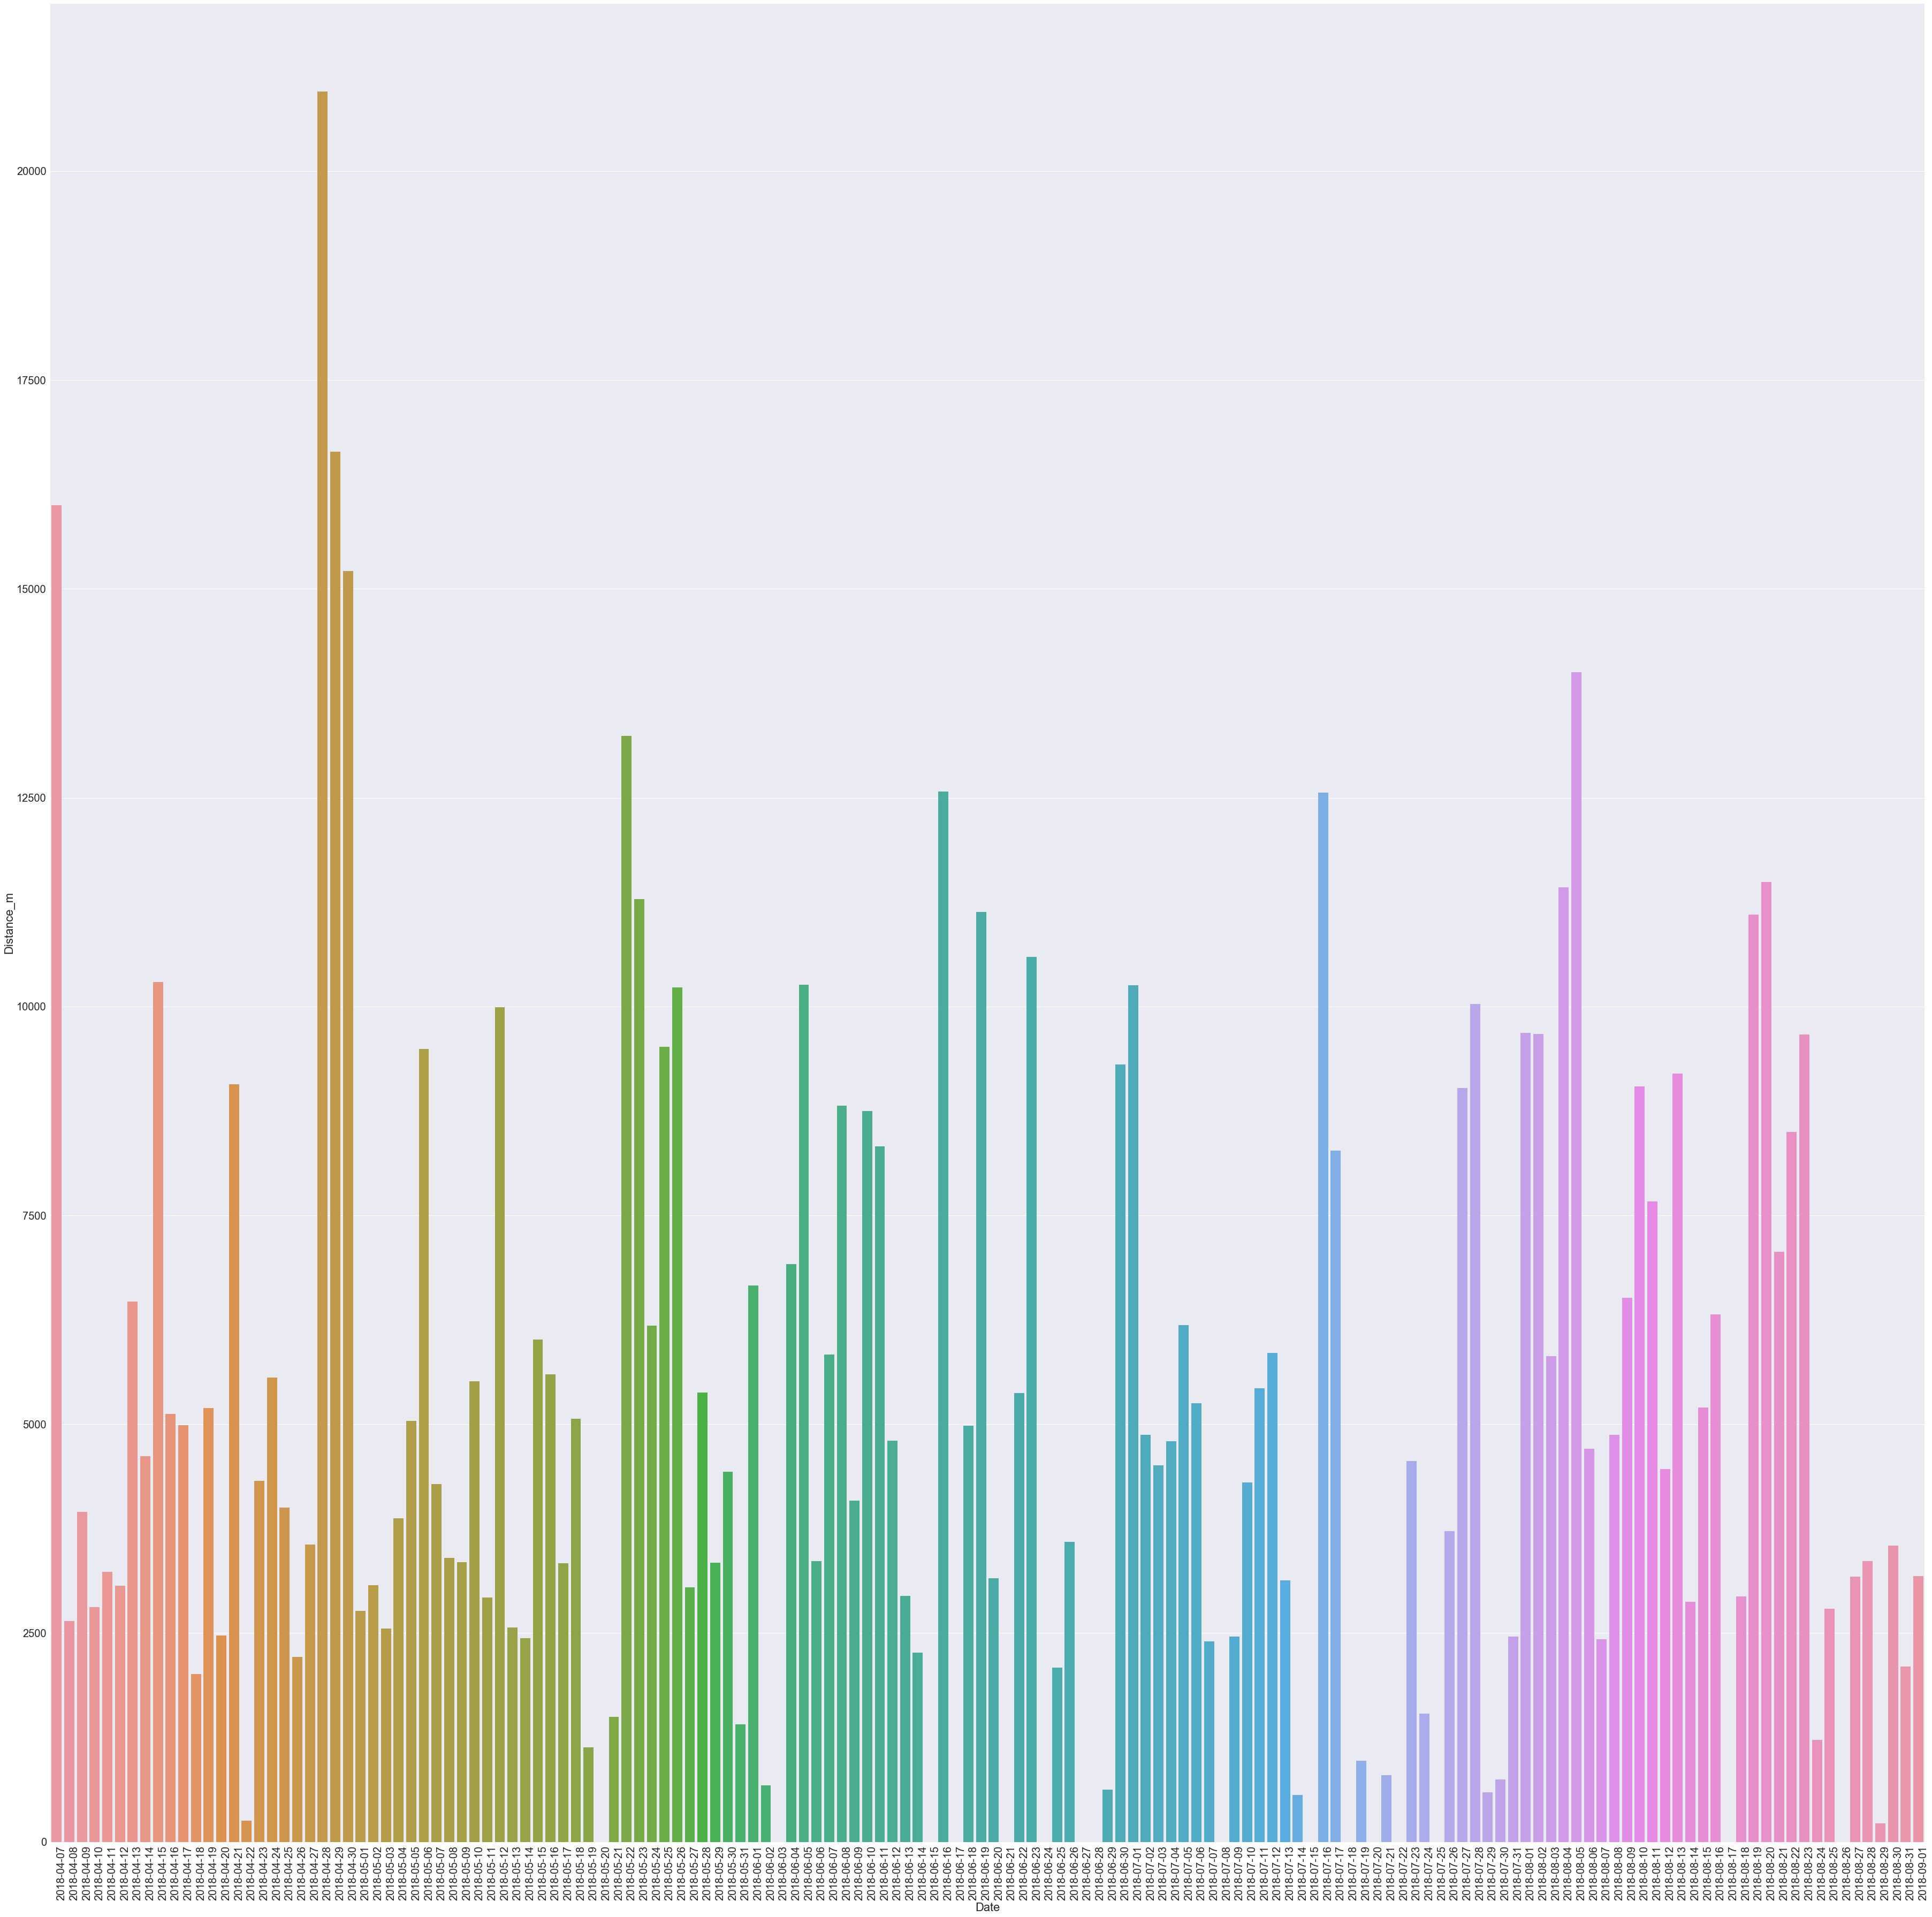

In [14]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(50.7,50.27)})
sns.set(font_scale = 2)
ax = sns.barplot(x="Date", y="Distance_m", data=df)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right",rotation_mode='anchor')
plt.tight_layout()
plt.show()


## Step_count and Date Analysis

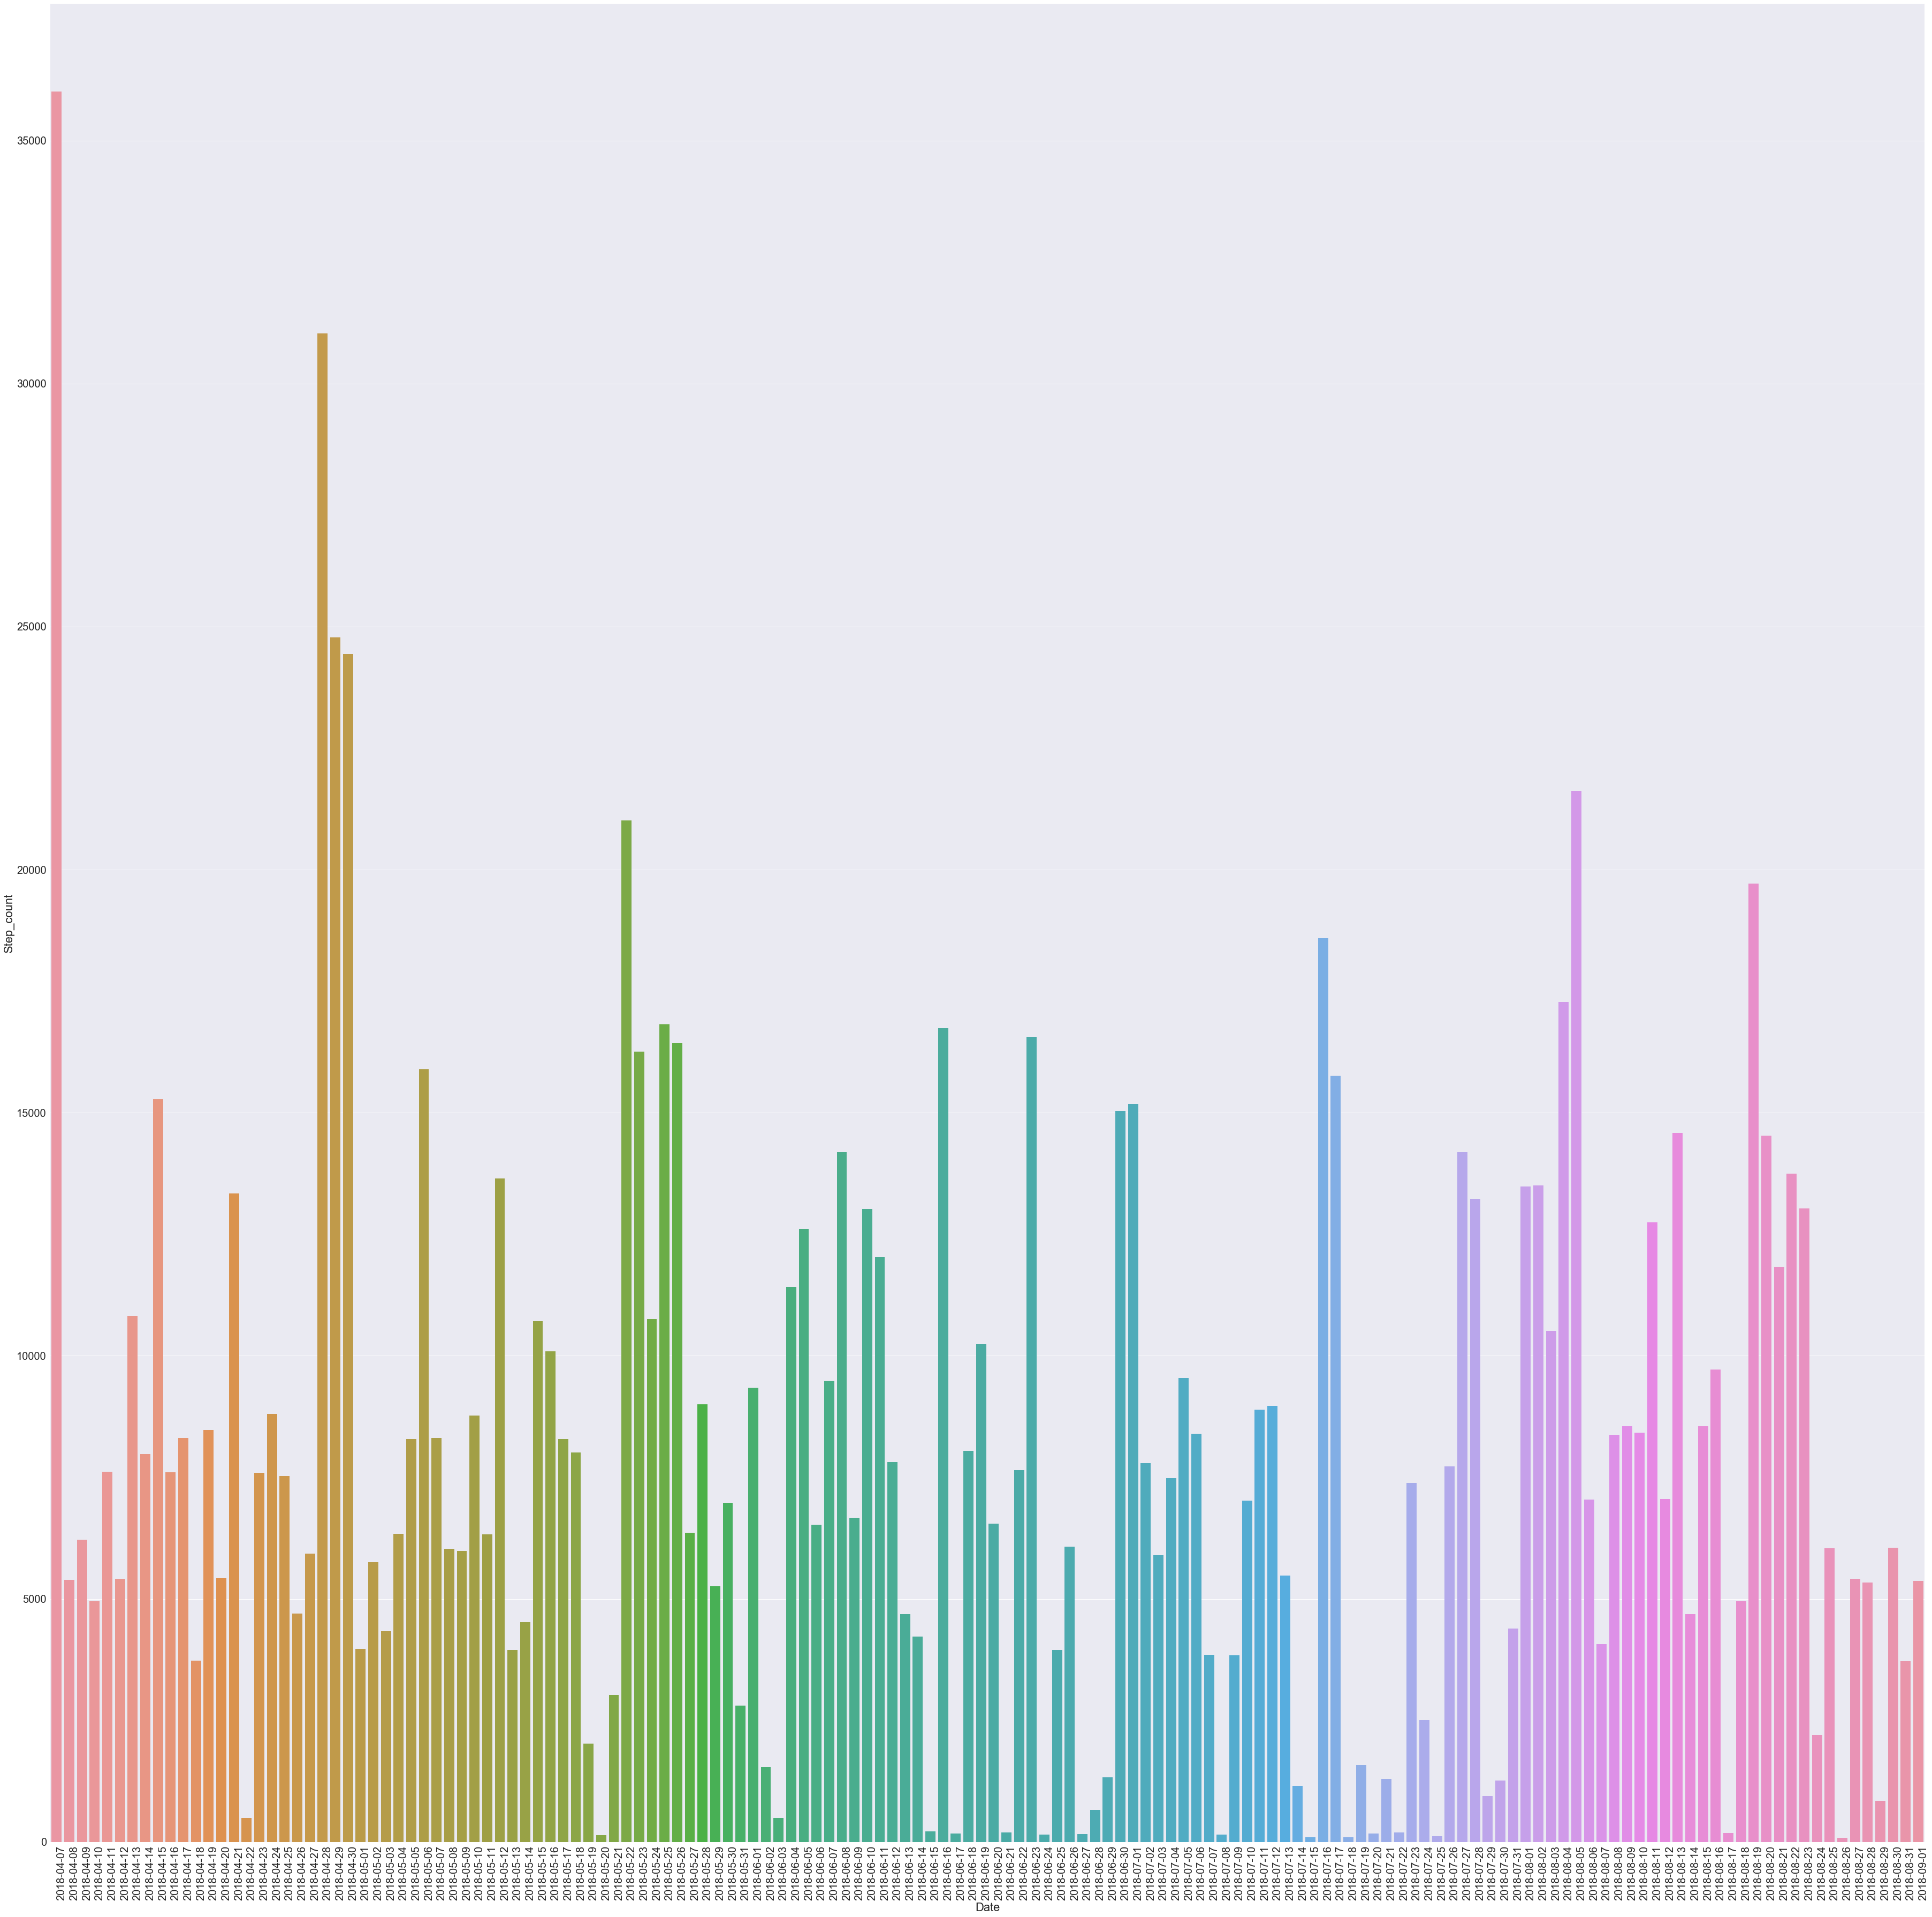

In [15]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(50.7,50.27)})
sns.set(font_scale = 2)
ax = sns.barplot(x="Date", y="Step_count", data=df)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right",rotation_mode='anchor')
plt.tight_layout()
plt.show()

## Location Analysis

In [16]:
low_locations = df[['Low_latitude_deg', 'Low_longitude_deg']]
low_locationlist = low_locations.values.tolist()

In [17]:
low_locations.head()

,Low_latitude_deg,Low_longitude_deg
0,49.240078,7.007611
1,49.239986,7.007116
2,49.240032,7.006672
3,49.240032,7.007427
4,49.233269,6.996095


In [18]:
import folium

In [19]:
low_locationlist[5]

[49.239967346191406, 7.006821155548097]

In [20]:

map = folium.Map(location=[49.2, 7.00], zoom_start=12)
for point in range(0, len(low_locationlist)):
    folium.Marker(low_locationlist[point], popup=df['Date'][point]).add_to(map)
map

## Swimming Analysis


In [21]:
df['Swimming_duration_ms'] = (df['Swimming_duration_ms']).astype(int)

In [22]:
print(df['Swimming_duration_ms'].max())

3600000


In [23]:
print(df['Swimming_duration_ms'].min())

0


In [24]:
df.loc[df['Swimming_duration_ms'].idxmax()]

Date                      2018-06-08
Calories_kcal                2688.33
Distance_m                   8815.74
Low_latitude_deg             48.1072
Low_longitude_deg             11.475
High_latitude_deg            48.1797
High_longitude_deg           11.6046
Average_speed_m_per_s       0.715404
Max_speed_m_per_s             2.6641
Min_speed_m_per_s          0.0478542
Step_count                     14188
Average_weight_kg                 68
Max_weight_kg                     68
Min_weight_kg                     68
Biking_duration_ms                 0
Inactive_duration_ms        63984158
Walking_duration_ms      1.40102e+07
Swimming_duration_ms         3600000
Name: 62, dtype: object

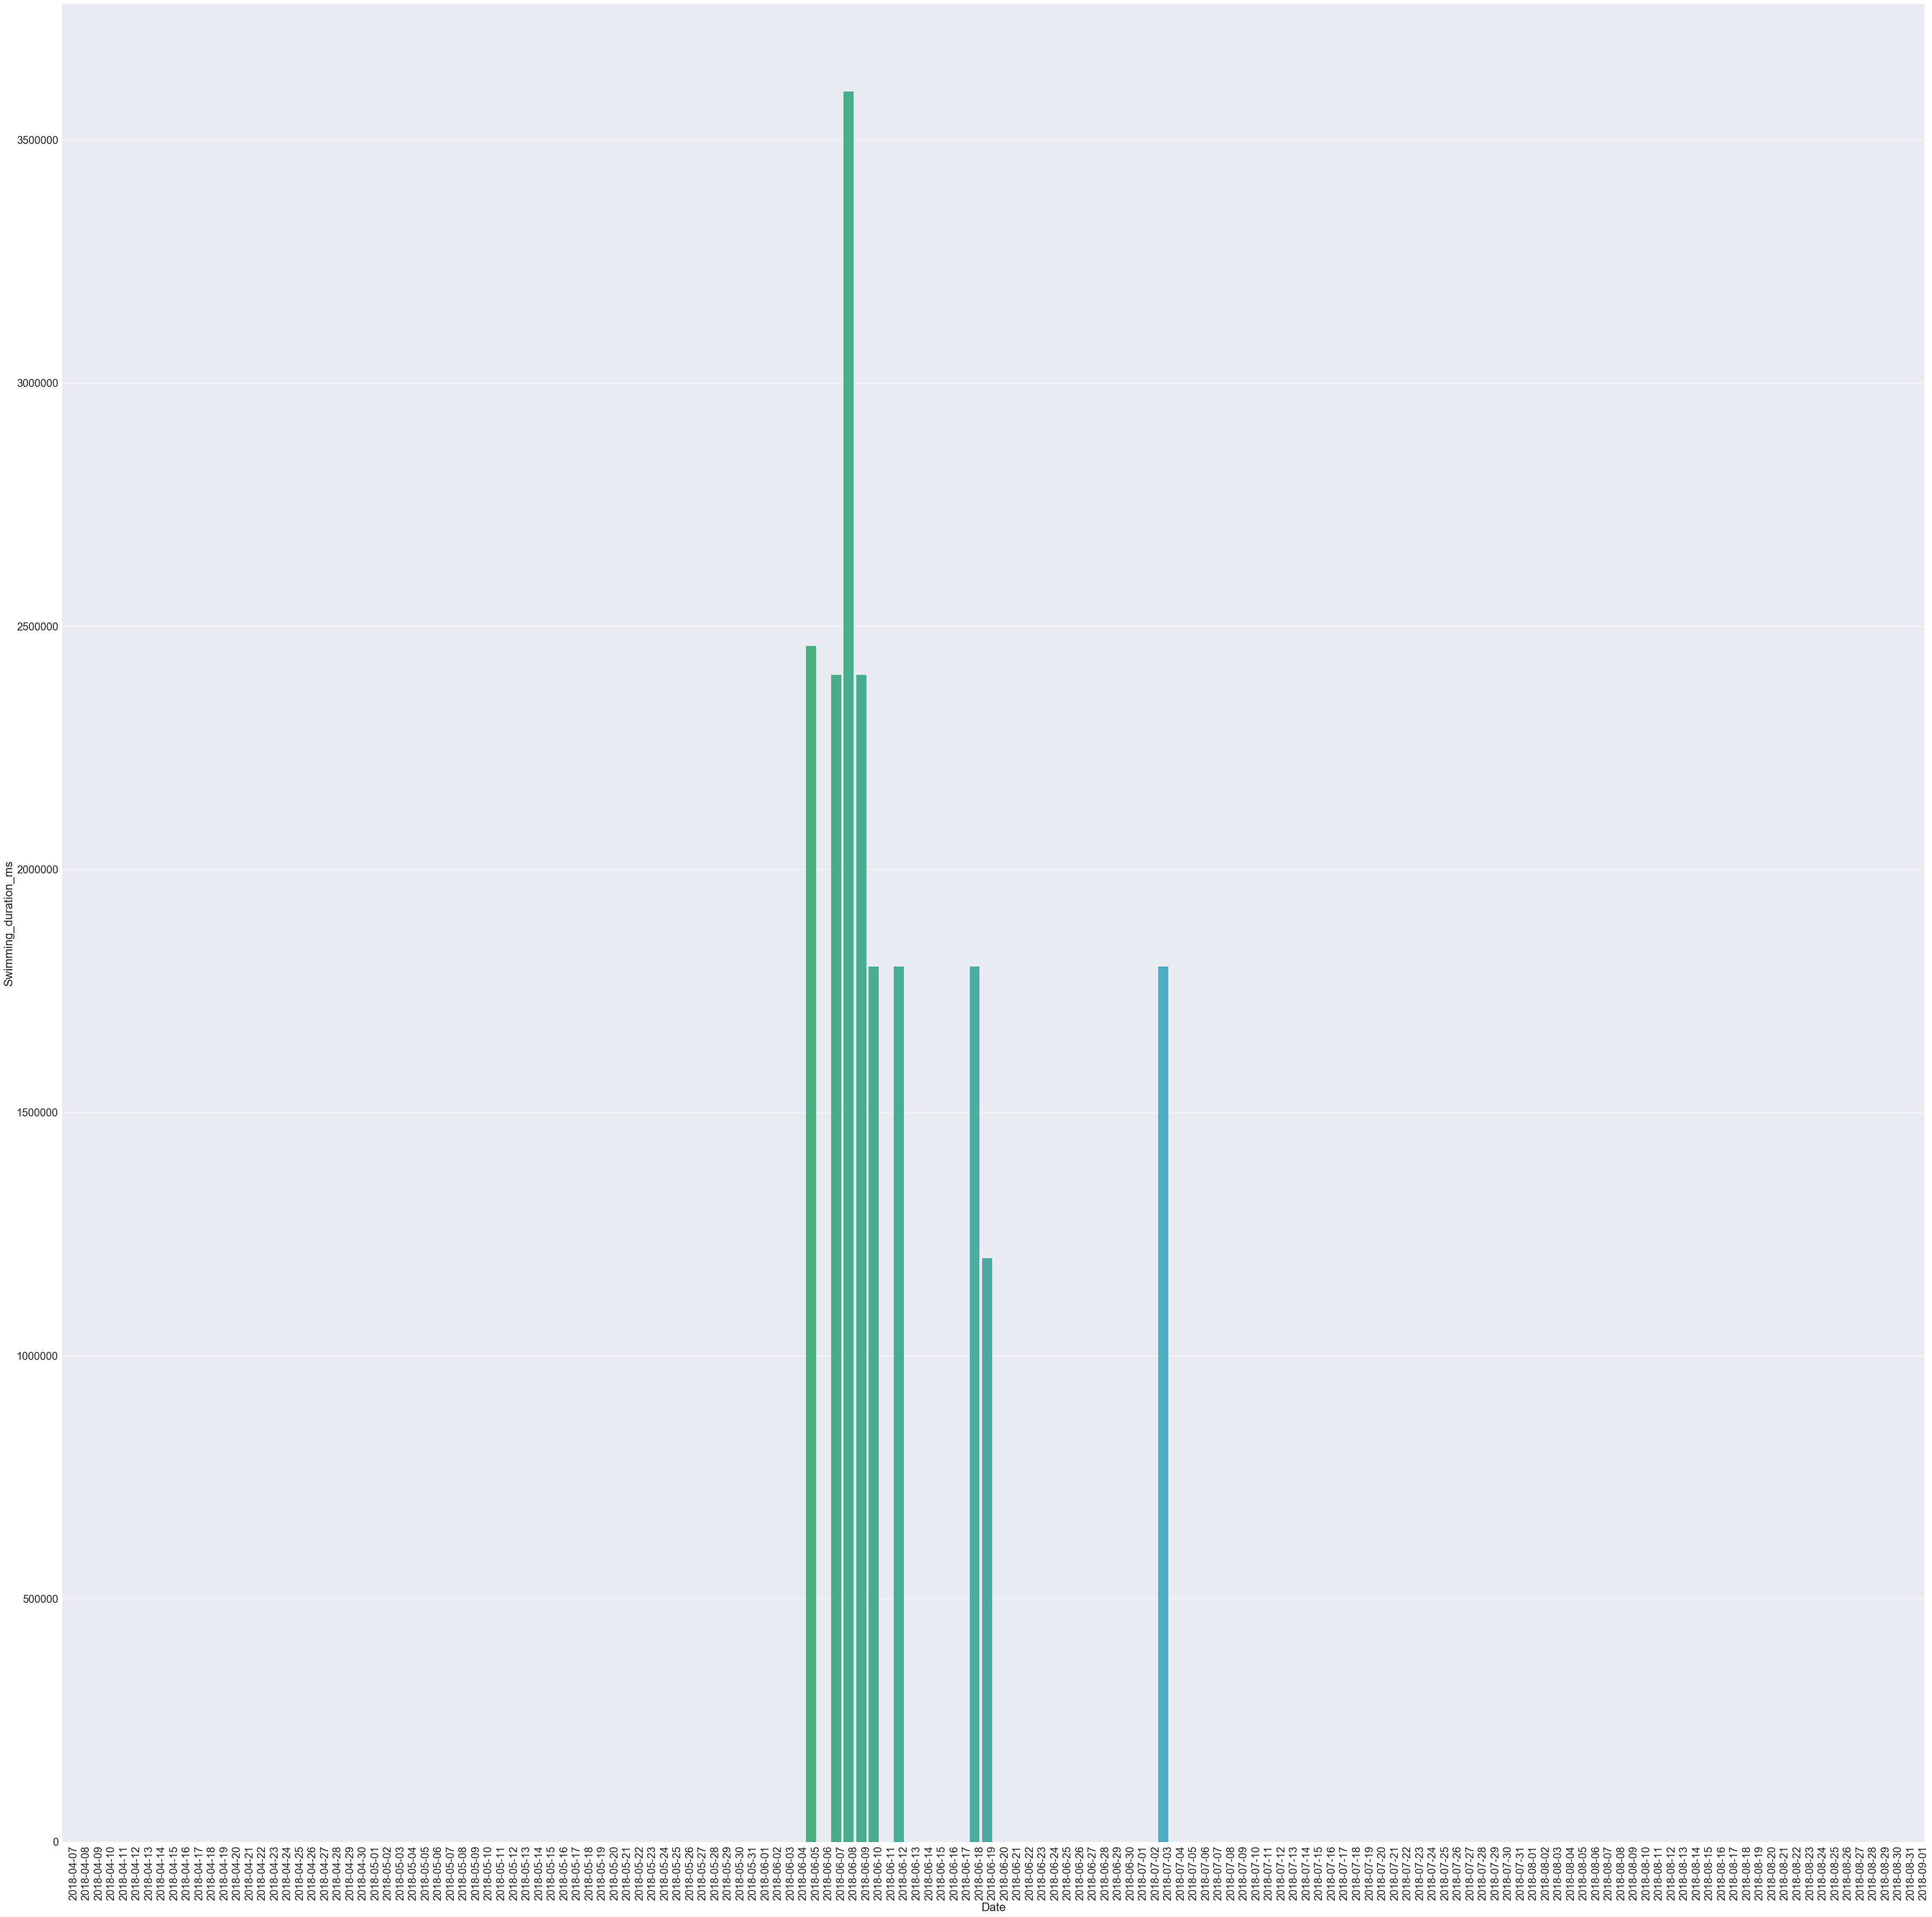

In [25]:
sns.set(style="whitegrid")
# sns.set(rc={'figure.figsize':(50.7,50.27)})
sns.set(font_scale = 2)
ax = sns.barplot(x="Date", y="Swimming_duration_ms", data=df)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right",rotation_mode='anchor')
plt.tight_layout()
plt.show()

# Google-Location History Analysis

In [26]:
import json
import os
import time
import datetime
file_path = '/Users/ashmi/Desktop/Takeout/Fit/Daily Aggregations/Location_History.json'
with open(file_path, encoding='utf-8') as data_file:
    data = json.loads(data_file.read())

location_data = pd.DataFrame(data['locations'])

In [27]:
from matplotlib.collections import PatchCollection
from IPython.display import Image
import fiona
from shapely.prepared import prep
from descartes import PolygonPatch
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
import warnings
warnings.filterwarnings('ignore')

In [28]:
location_data.head()

,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy
0,16,"[{'timestampMs': '1536010106375', 'activity': ...",NaN,NaN,226201999,884314579,1536010110470,NaN,NaN
1,16,"[{'timestampMs': '1536010024596', 'activity': ...",NaN,NaN,226201999,884314579,1536010048469,NaN,NaN
2,16,"[{'timestampMs': '1536009924038', 'activity': ...",NaN,NaN,226201999,884314579,1536009858682,NaN,NaN
3,16,"[{'timestampMs': '1536009711432', 'activity': ...",NaN,NaN,226201999,884314579,1536009797687,NaN,NaN
4,16,NaN,NaN,NaN,226201999,884314579,1536009521292,NaN,NaN


In [29]:
del(data) ## Freeing up space

In [30]:
# convert to typical units
location_data['latitudeE7'] = location_data['latitudeE7']/float(1e7) 
location_data['longitudeE7'] = location_data['longitudeE7']/float(1e7)
location_data['timestampMs'] = location_data['timestampMs'].map(lambda x: float(x)/1000) #to seconds
location_data['datetime'] = location_data.timestampMs.map(datetime.datetime.fromtimestamp)

# Rename fields based on the conversions we just did
location_data.rename(columns={'latitudeE7':'latitude', 'longitudeE7':'longitude', 'timestampMs':'timestamp'}, inplace=True)
location_data = location_data[location_data.accuracy < 1000] #Ignore locations with accuracy estimates over 1000m
location_data.reset_index(drop=True, inplace=True)

In [31]:
location_data.head()

,accuracy,activity,altitude,heading,latitude,longitude,timestamp,velocity,verticalAccuracy,datetime
0,16,"[{'timestampMs': '1536010106375', 'activity': ...",NaN,NaN,22.6202,88.431458,1.536010e+09,NaN,NaN,2018-09-04 02:58:30.470
1,16,"[{'timestampMs': '1536010024596', 'activity': ...",NaN,NaN,22.6202,88.431458,1.536010e+09,NaN,NaN,2018-09-04 02:57:28.469
2,16,"[{'timestampMs': '1536009924038', 'activity': ...",NaN,NaN,22.6202,88.431458,1.536010e+09,NaN,NaN,2018-09-04 02:54:18.682
3,16,"[{'timestampMs': '1536009711432', 'activity': ...",NaN,NaN,22.6202,88.431458,1.536010e+09,NaN,NaN,2018-09-04 02:53:17.687
4,16,NaN,NaN,NaN,22.6202,88.431458,1.536010e+09,NaN,NaN,2018-09-04 02:48:41.292


In [32]:
location_data.dtypes

accuracy                     int64
activity                    object
altitude                   float64
heading                    float64
latitude                   float64
longitude                  float64
timestamp                  float64
velocity                   float64
verticalAccuracy           float64
datetime            datetime64[ns]
dtype: object

In [33]:
print("earliest observed date: {}".format(min(location_data["datetime"]).strftime('%m-%d-%Y')))
print("latest observed date: {}".format(max(location_data["datetime"]).strftime('%m-%d-%Y')))

earliest_obs = min(location_data["datetime"]).strftime('%m-%d-%Y')
latest_obs = max(location_data["datetime"]).strftime('%m-%d-%Y')

earliest observed date: 06-11-2013
latest observed date: 09-04-2018


In [34]:
degrees_to_radians = np.pi/180.0 
location_data['phi'] = (90.0 - location_data.latitude) * degrees_to_radians 
location_data['theta'] = location_data.longitude * degrees_to_radians
# Compute distance between two GPS points on a unit sphere
location_data['distance'] = np.arccos(
    np.sin(location_data.phi)*np.sin(location_data.phi.shift(-1)) * np.cos(location_data.theta - location_data.theta.shift(-1)) + 
    np.cos(location_data.phi)*np.cos(location_data.phi.shift(-1))) * 6378.100 # radius of earth in km

In [35]:
location_data['speed'] = location_data.distance/(location_data.timestamp - location_data.timestamp.shift(-1))*3600 #km/hr

In [36]:
flight_data = pd.DataFrame(data={'end_lat':location_data.latitude,
                             'end_lon':location_data.longitude,
                             'end_datetime':location_data.datetime,
                             'distance':location_data.distance,
                             'speed':location_data.speed,
                             'start_lat':location_data.shift(-1).latitude,
                             'start_lon':location_data.shift(-1).longitude,
                             'start_datetime':location_data.shift(-1).datetime,
                             }).reset_index(drop=True)

In [37]:
def distance_on_unit_sphere(lat1, long1, lat2, long2):
    # http://www.johndcook.com/python_longitude_latitude.html
    # Convert latitude and longitude to spherical coordinates in radians.
    degrees_to_radians = np.pi/180.0  
    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians
    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians

    cos = (np.sin(phi1)*np.sin(phi2)*np.cos(theta1 - theta2) + 
           np.cos(phi1)*np.cos(phi2))
    arc = np.arccos( cos )
    # Remember to multiply arc by the radius of the earth 
    # in your favorite set of units to get length.
    return arc

In [38]:
flights = flight_data[(flight_data.speed > 40) & (flight_data.distance > 80)].reset_index()

# Combine instances of flight that are directly adjacent 
# Find the indices of flights that are directly adjacent
_f = flights[flights['index'].diff() == 1]
adjacent_flight_groups = np.split(_f, (_f['index'].diff() > 1).nonzero()[0])

# Now iterate through the groups of adjacent flights and merge their data into
# one flight entry
for flight_group in adjacent_flight_groups:
    idx = flight_group.index[0] - 1 #the index of flight termination
    flights.loc[idx, ['start_lat', 'start_lon', 'start_datetime']] = [flight_group.iloc[-1].start_lat, 
                                                         flight_group.iloc[-1].start_lon, 
                                                         flight_group.iloc[-1].start_datetime]
    # Recompute total distance of flight
    flights.loc[idx, 'distance'] = distance_on_unit_sphere(flights.loc[idx].start_lat,
                                                           flights.loc[idx].start_lon,
                                                           flights.loc[idx].end_lat,
                                                           flights.loc[idx].end_lon)*6378.1   

# Now remove the "flight" entries we don't need anymore.
flights = flights.drop(_f.index).reset_index(drop=True)

# Finally, we can be confident that we've removed instances of flights broken up by
# GPS data points during flight. We can now be more liberal in our constraints for what
# constitutes flight. Let's remove any instances below 200km as a final measure.
flights = flights[flights.distance > 200].reset_index(drop=True)

In [39]:
fig = plt.figure(figsize=(18,12))

# Plotting across the international dateline is tough. One option is to break up flights
# by hemisphere. Otherwise, you'd need to plot using a different projection like 'robin'
# and potentially center on the Int'l Dateline (lon_0=-180)
# flights = flights[(flights.start_lon < 0) & (flights.end_lon < 0)]# Western Hemisphere Flights
# flights = flights[(flights.start_lon > 0) & (flights.end_lon > 0)] # Eastern Hemisphere Flights

xbuf = 0.2
ybuf = 0.35
min_lat = np.min([flights.end_lat.min(), flights.start_lat.min()])
min_lon = np.min([flights.end_lon.min(), flights.start_lon.min()])
max_lat = np.max([flights.end_lat.max(), flights.start_lat.max()])
max_lon = np.max([flights.end_lon.max(), flights.start_lon.max()])
width = max_lon - min_lon
height = max_lat - min_lat



In [40]:
import rasterio

In [41]:
# m = Basemap(llcrnrlon=min_lon - width* xbuf,
#             llcrnrlat=min_lat - height*ybuf,
#             urcrnrlon=max_lon + width* xbuf,
#             urcrnrlat=max_lat + height*ybuf,
#             projection='merc',
#             resolution='l',
#             lat_0=min_lat + height/2,
#             lon_0=min_lon + width/2,)




In [42]:
# m.drawmapboundary(fill_color='#EBF4FA')
# m.drawcoastlines()
# m.drawstates()
# m.drawcountries()
# m.fillcontinents()

# current_date = time.strftime("printed: %a, %d %b %Y", time.localtime())

# for idx, f in flights.iterrows():
#     m.drawgreatcircle(f.start_lon, f.start_lat, f.end_lon, f.end_lat, linewidth=3, alpha=0.4, color='b' )
#     m.plot(*m(f.start_lon, f.start_lat), color='g', alpha=0.8, marker='o')
#     m.plot(*m(f.end_lon, f.end_lat), color='r', alpha=0.5, marker='o' )

# fig.text(0.125, 0.18, "Data collected from 2013-2017 on Android \nPlotted using Python, Basemap \n%s" % (current_date),
#         ha='left', color='#555555', style='italic')
# fig.text(0.125, 0.15, "kivanpolimis.com", color='#555555', fontsize=16, ha='left')
# plt.savefig('flights.png', dpi=150, frameon=False, transparent=False, bbox_inches='tight', pad_inches=0.2)
